###### BEST PRACTICES FOR 
###### DECIDING LEARNING RATE FOR GRADIENT DESCENT  and 
###### NUMBER OF ITERATIONS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


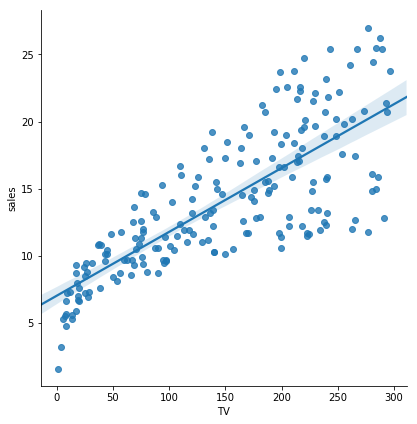

In [2]:
sns.pairplot(data, x_vars=['TV'],y_vars=['sales'], aspect=1, size=6, kind='reg')

Steps to be followed while deciding Learning Rate is simple:
1. Go from range 0.1 to 0.000001 (start from 0.1)
2. Decrease the learning rate each time by a factor of 1/3.
    For example: 0.1 to 0.6 to 0.3 to 0.01, and so on.
3. While deciding learning rate if 
   
   a) Learning rate is too high the gradient descent function would overshoot
      and will not reach the minimum.
   
   b) A low Learning rate would lead to a very slow computation of the parameters, as 
      your model would be taking very tiny little steps to reach the minimum.
      
 I will demonstrate how to decide the learning rate for linear regression model of the TV vs. Sales data.

Ok! So first let us keep the number of iterations fixed let us say 250 and then plot the Cost Funcion J($\theta$) as a function of learning rate.

I have to write this method again and again, it would be great if I could import functions from other notebooks.
Hence I will ***HAVE TO FIND A WAY TO DO IT.***

In [3]:
def Gradient_descent(x, y, learning_rate, iterations, return_theta):
    
    theta_0=np.random.randint(low=2, high=5); 
    theta_1=np.random.randint(low=2, high=5);
    m = x.shape[0]
    
    l_r = learning_rate

    def mean_error(a, b):
      sum_mean = 0
      for i in range(m):
        sum_mean+= a[i] - b[i]
      return sum_mean/m

    def perform_cal(theta_0,theta_1, m):
      h_xi = theta_0 + theta_1*x
      temp_0 = theta_0 - learning_rate*mean_error( h_xi, y)
      temp_1 = theta_1 - learning_rate*mean_error(h_xi*x, y*x)
      return temp_0 , temp_1

    list_cost_func = []
    
    def cost_func(theta_0, theta_1):
        cost_func_val = 0
        for i in range(m):
            cost_func_val += (theta_1*x[i] + theta_0 - y[i])**2
        return cost_func_val/(2*m)

    for i in range(iterations):
        theta_0, theta_1 = perform_cal(theta_0, theta_1, m)
        list_cost_func.append(cost_func(theta_0, theta_1))

    if return_theta:
        return theta_0,theta_1
    else:
        return list_cost_func

In [4]:
x = data['TV']
y = data['sales']
print(x.shape)
print(y.shape)

(200,)
(200,)


/home/sachin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
/home/sachin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/home/sachin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply
/home/sachin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/sachin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


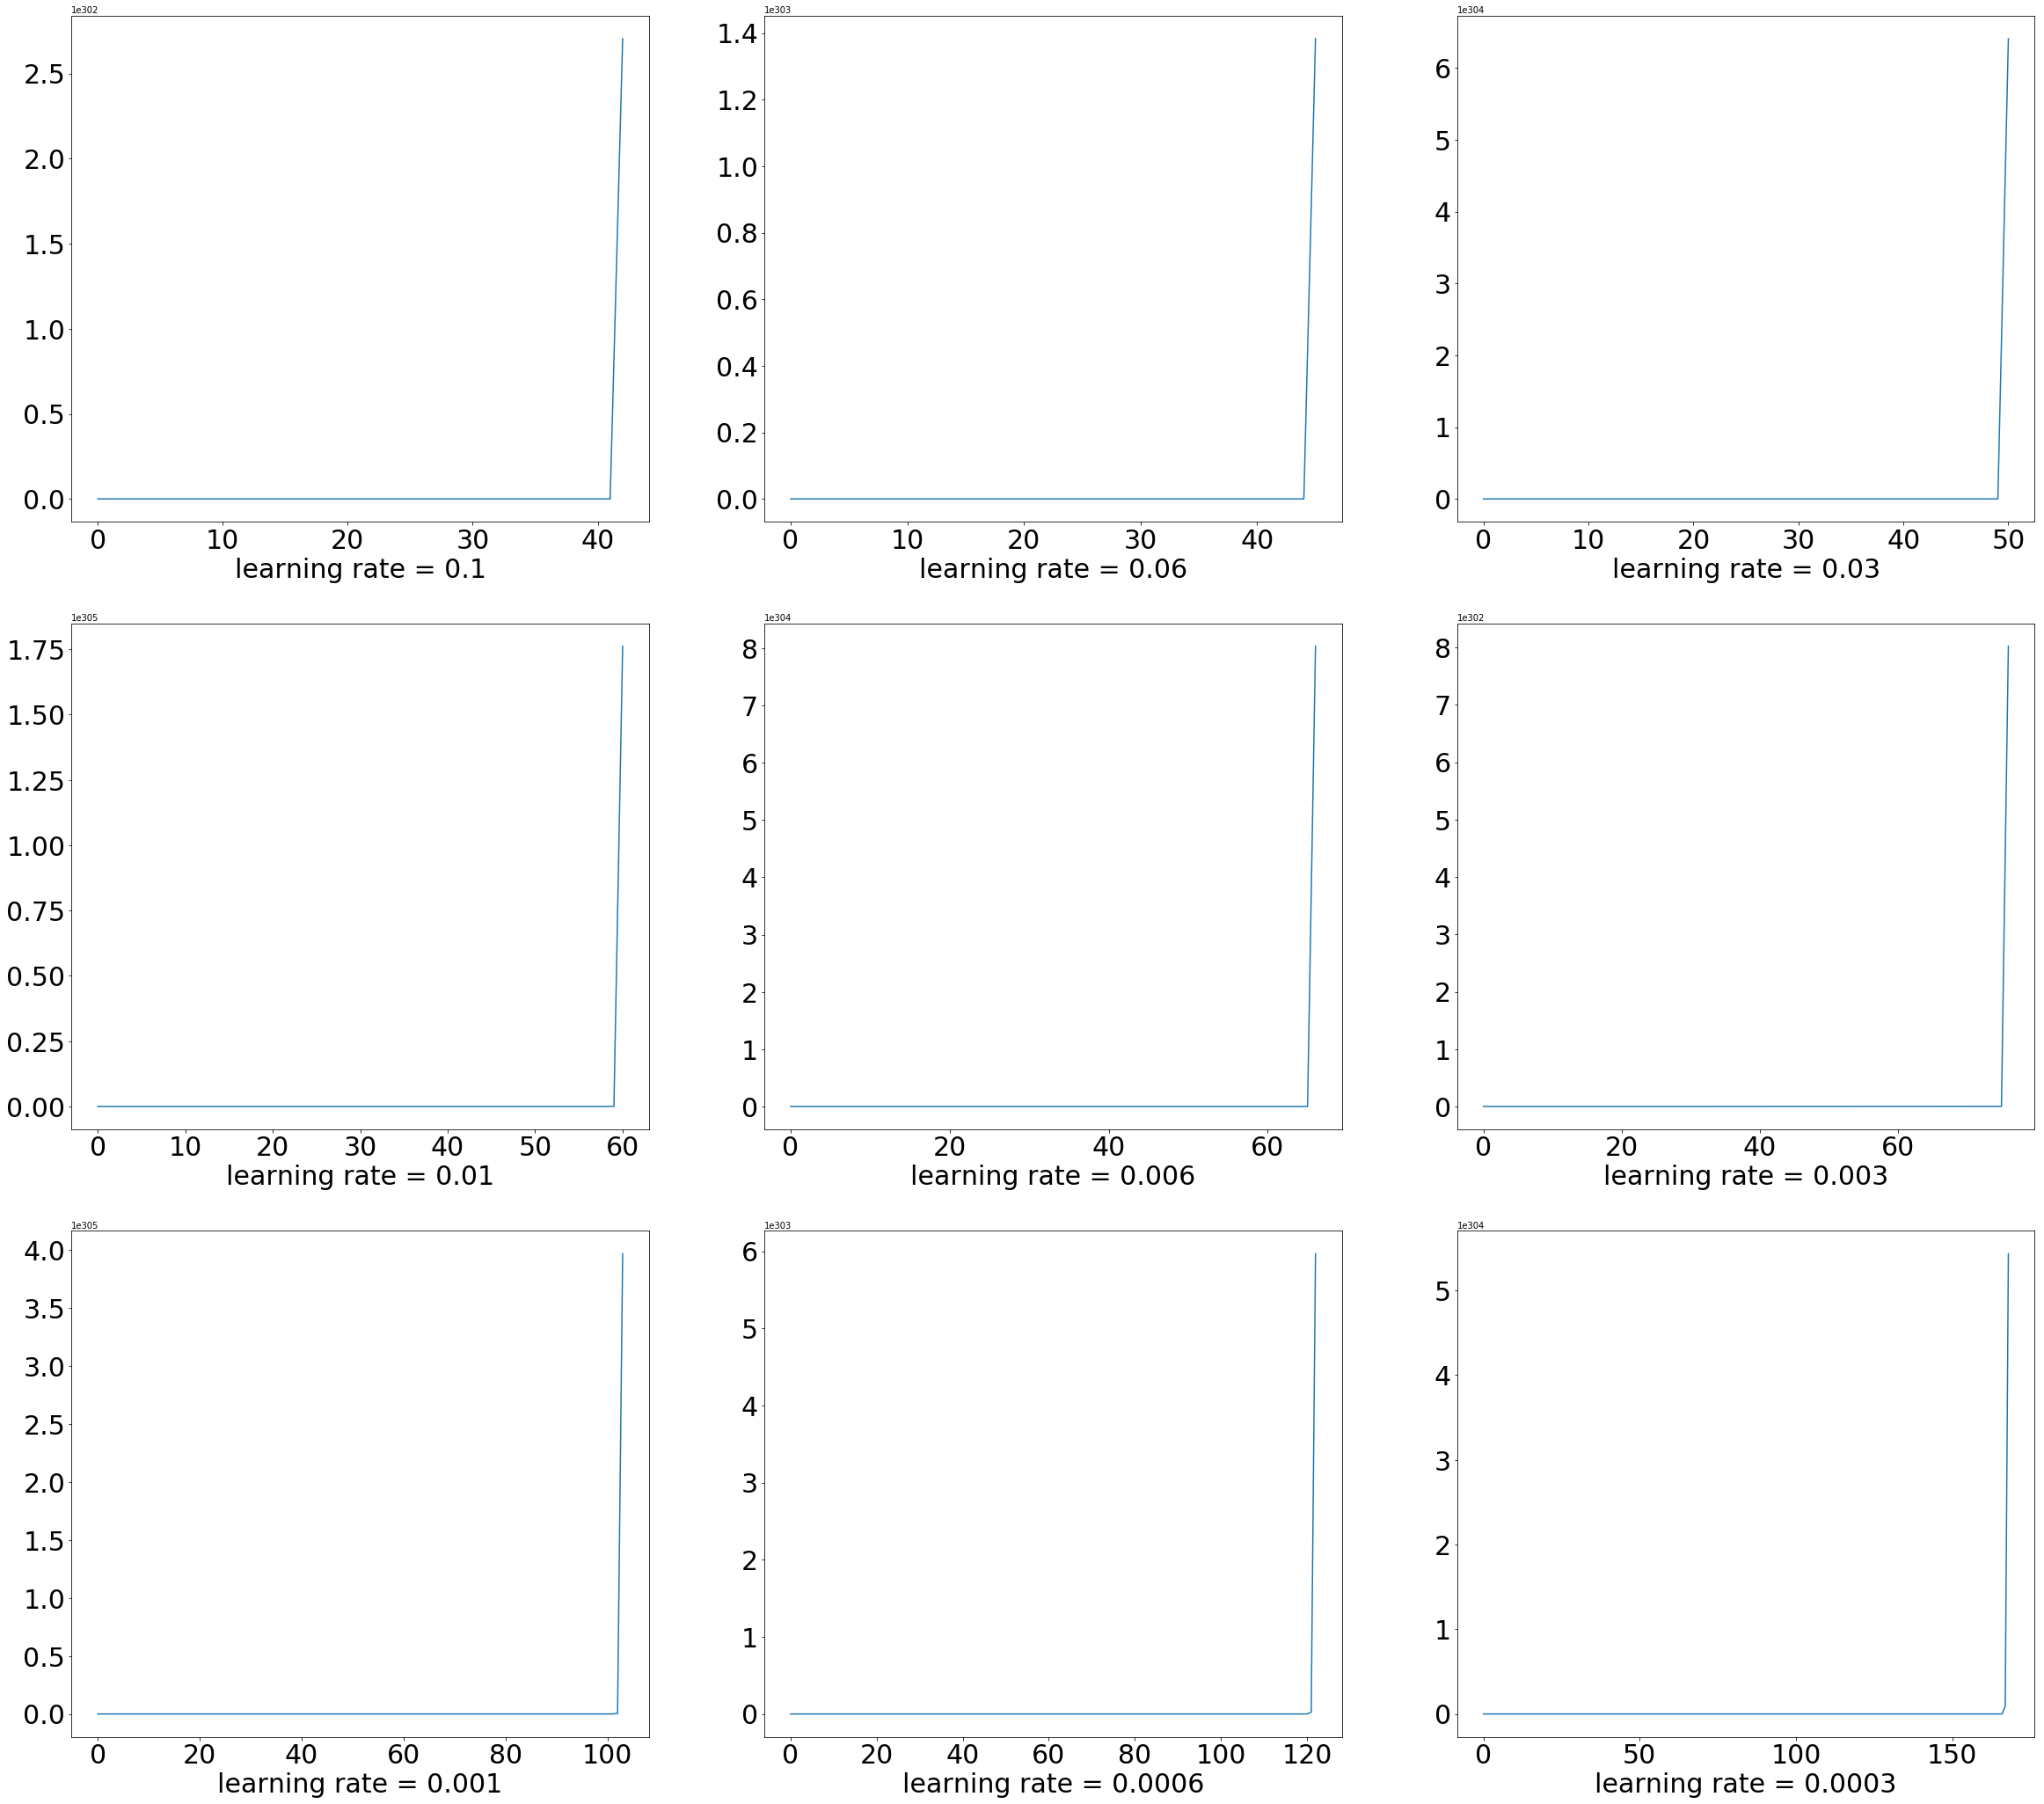

In [5]:
x = np.array(x)
y = np.array(y)
def learning_rate_finder(learning_rate):
    l_r = learning_rate 
    
    fig = plt.figure(figsize=(30,30))
    rows = l_r.shape[0] ;cols = l_r.shape[1]
    fig,ax = plt.subplots(nrows=rows, ncols=cols)
    fig.set_figheight(12*rows)
    fig.set_figwidth(40)
    iterations = np.arange(300)
    
    for i in range(rows):
        for j in range(cols):
            cost_func = Gradient_descent(x,y, l_r[i][j], 300, False)  
            ax[i,j].plot(iterations, cost_func)
            ax[i,j].tick_params(axis='both',labelsize=30)    
            ax[i,j].set_xlabel(f'learning rate = {l_r[i][j]}', fontsize=30)
learning_rate = np.array([(0.1 , 0.06  ,0.03),
                          (0.01 ,0.006 ,0.003), 
                          (0.001,0.0006,0.0003)])
learning_rate_finder(learning_rate)

So as you can see the cost function J($\theta$) instead of decreasing with the number of iterations, overshoots up. Hence our above choice of values of learning rate aren't correct.

So we will further decrease our learning rate values.

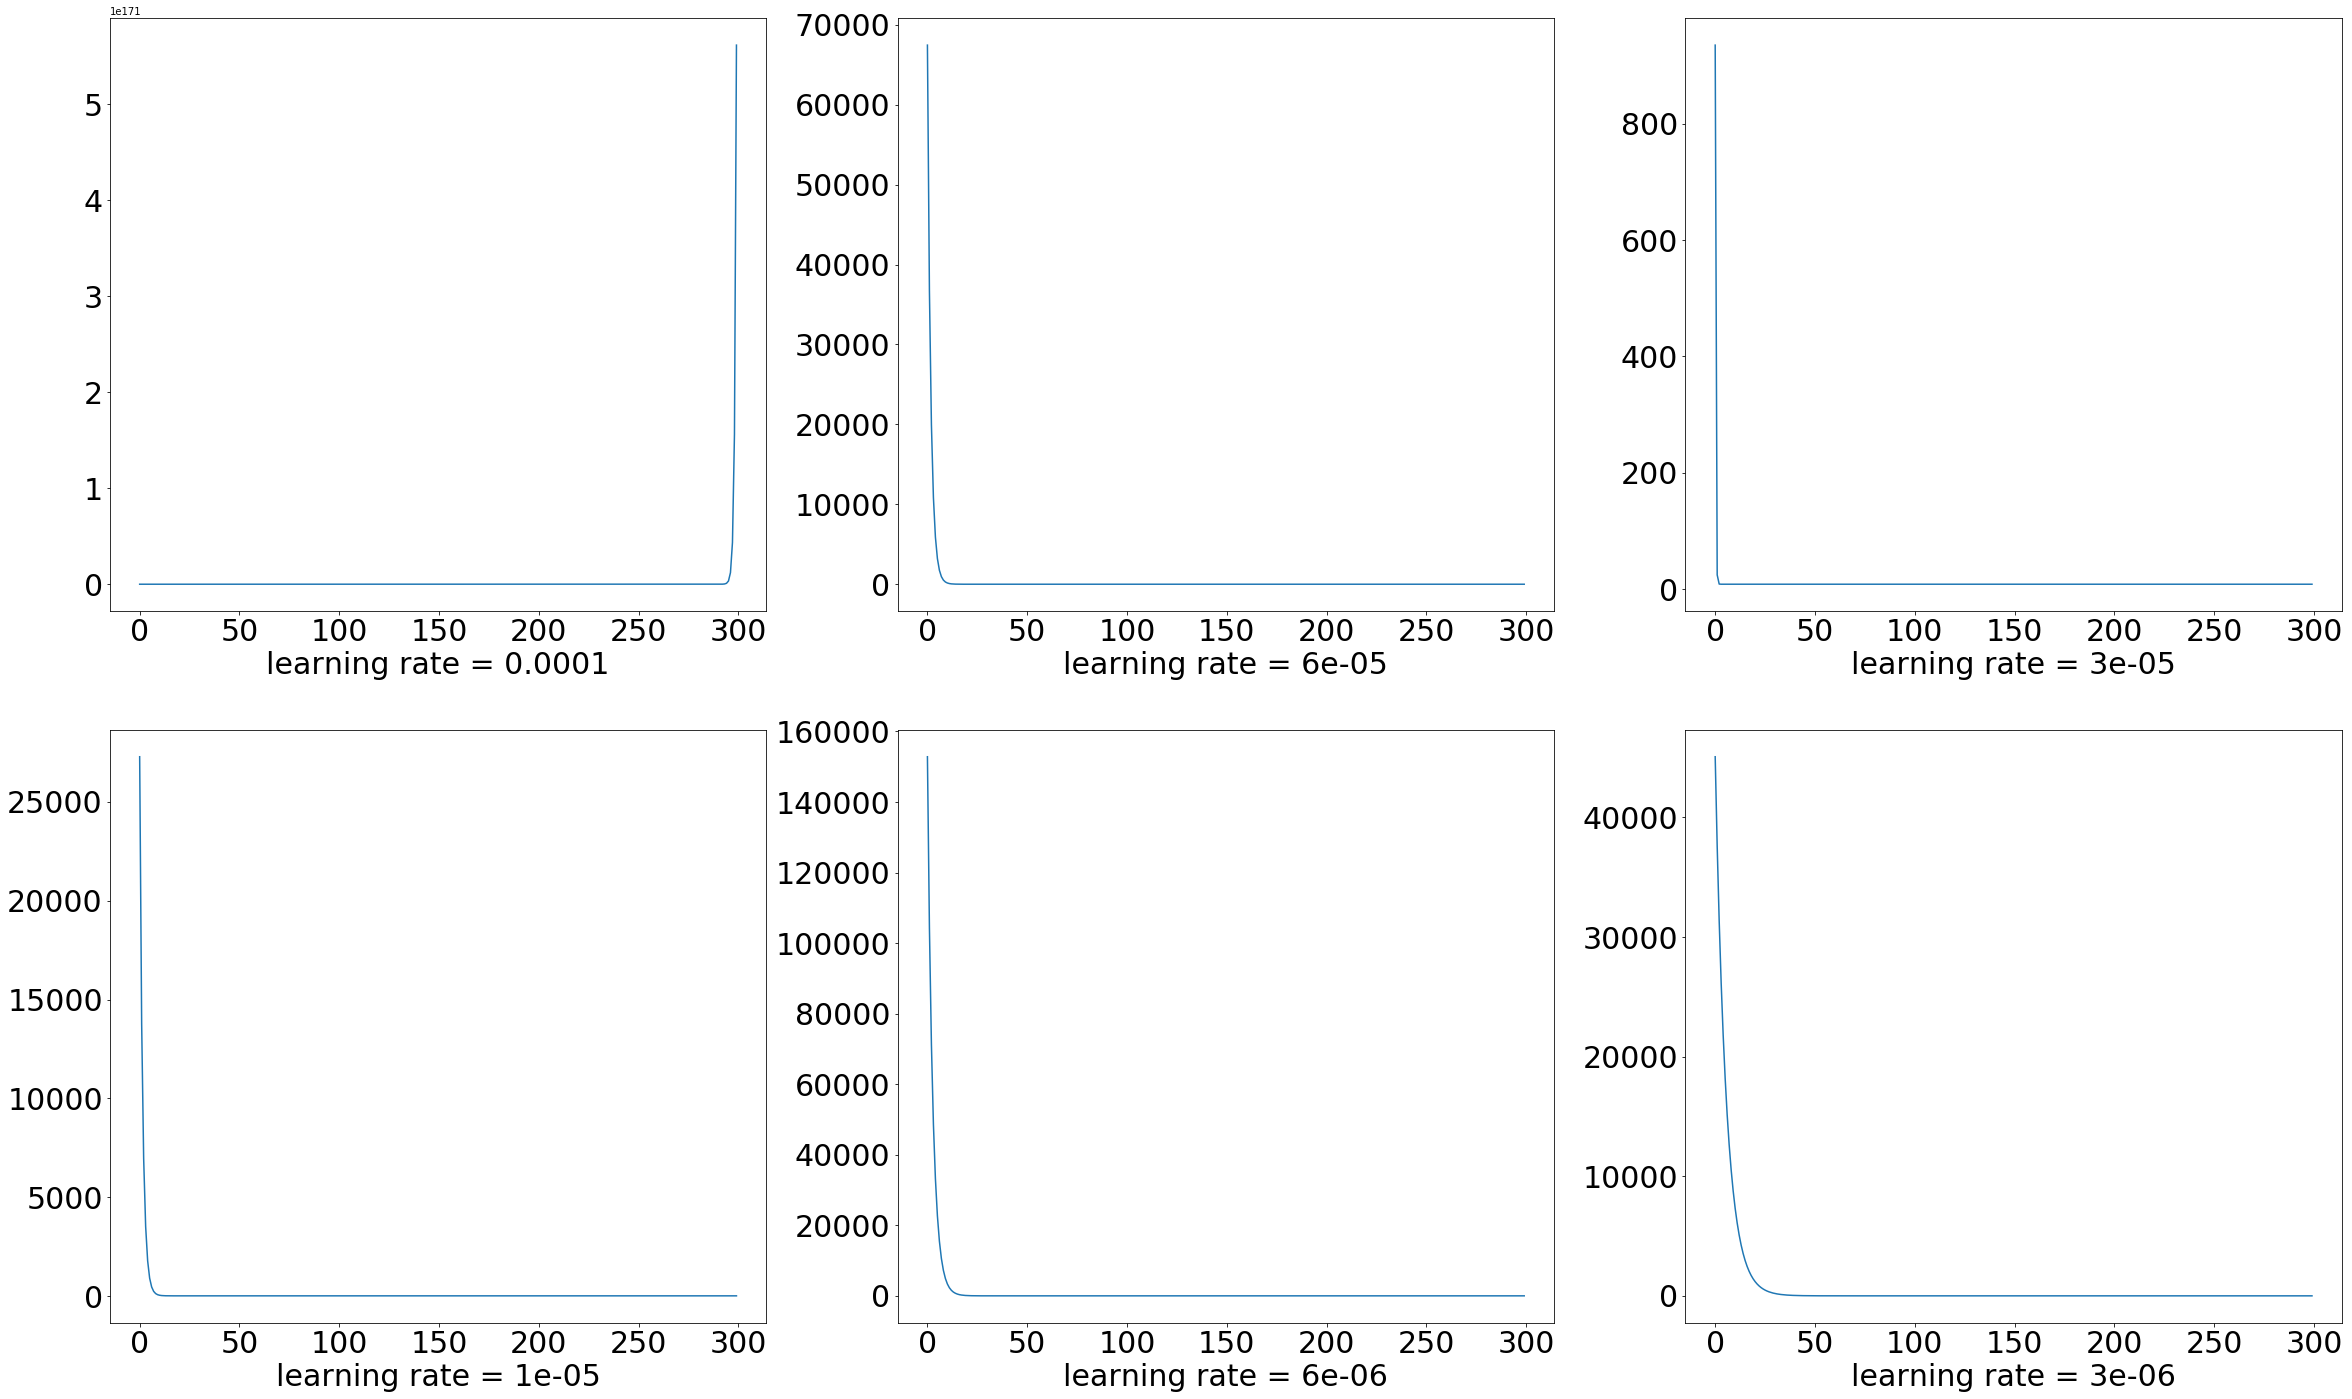

In [6]:
learning_rate2 = np.array([(0.0001 , 0.00006  ,0.00003),
                          (0.00001 ,0.000006 ,0.000003)])

learning_rate_finder(learning_rate2)

Now when the learning rate is 0.0001, the cost function still increases with no. of iterations. Hence it is too high a value and when learning rate = 0.00006 the cost function decreases with increasing no. of iterations. Hence our learning rate lies within these values.

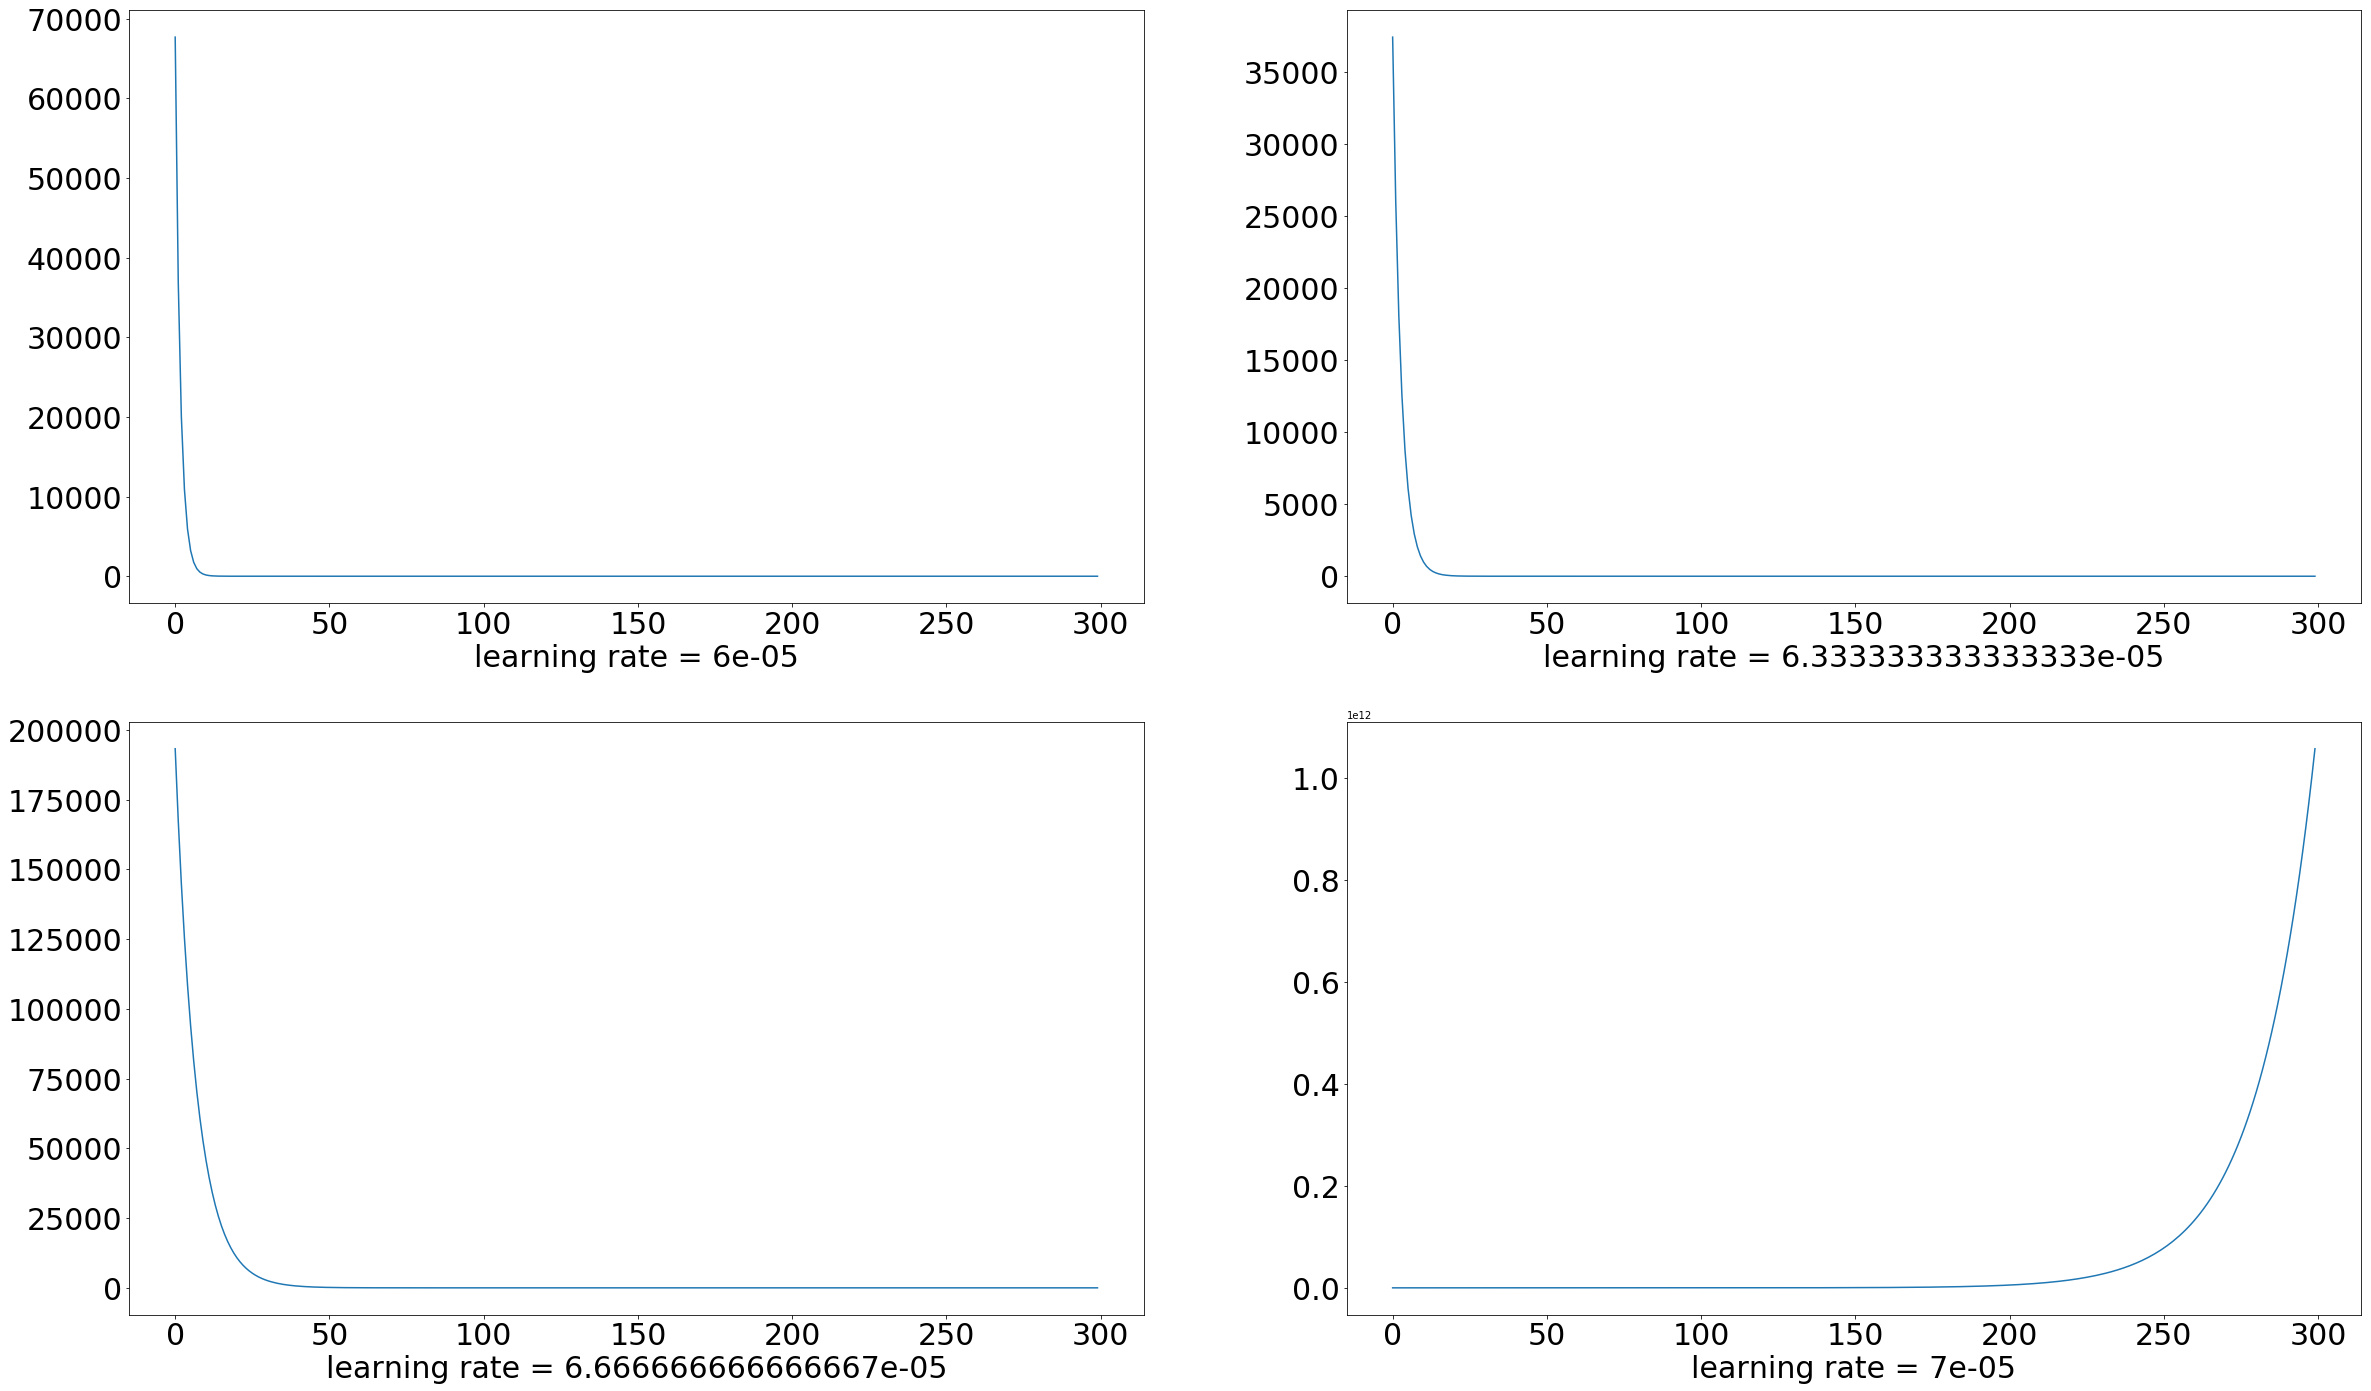

In [7]:
learning_rate3 = np.linspace(0.00006, 0.00007, 4).reshape((2,2))  #dividing the range into 3 parts
learning_rate_finder(learning_rate3)

Hence **learning rate = 0.000066** is a good learning rate for this Linear Regression model.
As it ensures that the gradient descent algorithm works properly. And it is highest value satisfying the property thus making the speed of descending faster and thus taking less time to predict results.

###### Deciding the number of Iterations

Now when we reach a point such that after which, a very less significant decrease in the cost function J($\theta$) occurs in successive iterations, then we can stop the iteration over there.

That point can be easily found out by plotting the cost_function vs iterations graph.

diff between 1000 & 999 iteration is  0.0000380313


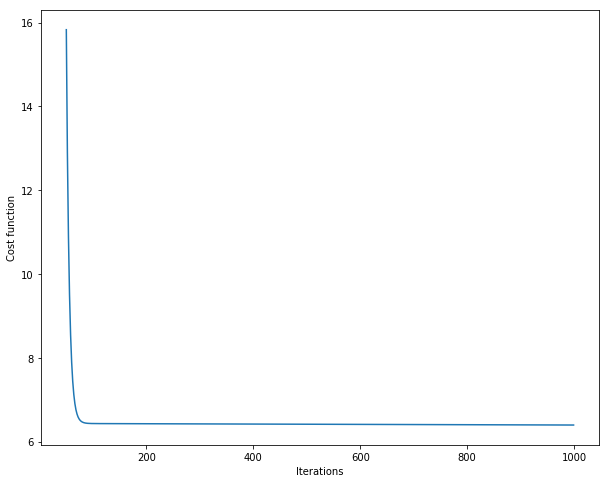

In [12]:
#as initial values of cost function are very high and they destroy the scale of the graph
# we neglect the first 50 values
cost_func = Gradient_descent(x, y, 0.000066, 1000, False)
iterations = np.arange(50,1000)
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
ax.plot(iterations, cost_func[50:1000])
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost function')
print("diff between 1000 & 999 iteration is ",'{0:.10f}'.format(cost_func[998]-cost_func[999]))

As we see that after 1000 iterations the value of cost function decreases only by an amount of  0.0000381582, which is quite low. Hence it is fine to stop at 1000 iterations.

Now let us plot the linear model.

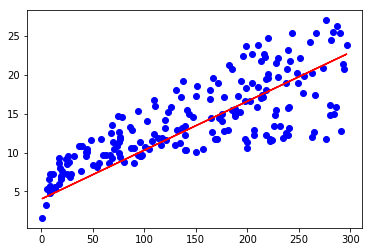

In [9]:
theta_0, theta_1 = Gradient_descent(x, y, 0.000066, 1000, True)
fig, ax = plt.subplots()
y_pred = theta_0 + theta_1*x
ax.plot(x, y, marker='o', color='b', linestyle='None')
ax.plot(x, y_pred, color='r')